In [96]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
city_df.head()
ride_df.head()
# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df,on="city",how="outer")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

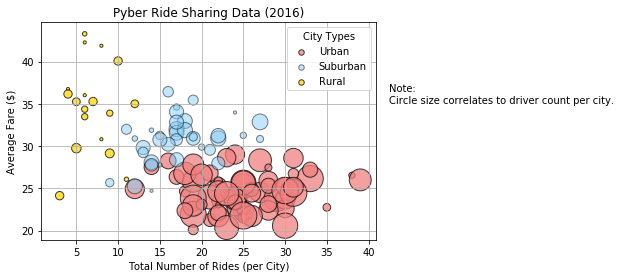

In [223]:
# Obtain the x and y coordinates for each of the three city types
urban_df = combined_df.loc[(combined_df['type'] == "Urban"),:]
grouped_urban_df = urban_df.groupby(['city'])
urban_x_axis=grouped_urban_df['ride_id'].count()
urban_y_axis=grouped_urban_df['fare'].mean()
urban_s = grouped_urban_df['driver_count'].unique()
urban_s_df = pd.DataFrame({"Driver Count":urban_s})
urban_s_df["Driver Count"] = urban_s_df["Driver Count"].astype(float) 

suburban_df = combined_df.loc[(combined_df['type'] == "Suburban"),:]
grouped_suburban_df = suburban_df.groupby(['city'])
suburban_x_axis = grouped_suburban_df['ride_id'].count()
suburban_y_axis = grouped_suburban_df['fare'].mean()
suburban_s = grouped_suburban_df['driver_count'].unique()
suburban_s_df = pd.DataFrame({"Driver Count":suburban_s})
suburban_s_df["Driver Count"] = suburban_s_df["Driver Count"].astype(float) 

rural_df = combined_df.loc[(combined_df['type'] == "Rural"),:]
grouped_rural_df = rural_df.groupby(['city'])
rural_x_axis=grouped_rural_df['ride_id'].count()
rural_y_axis=grouped_rural_df['fare'].mean()
rural_s = grouped_rural_df['driver_count'].unique()
rural_s_df = pd.DataFrame({"Driver Count":rural_s})
rural_s_df['Driver Count'] = rural_s_df['Driver Count'].astype(float)


# # Build the scatter plots for each city types
plt.scatter(urban_x_axis,urban_y_axis, marker="o",s=(urban_s_df["Driver Count"])*10 ,facecolors="lightcoral", edgecolors = 'black',alpha=0.75, label="Urban")
plt.scatter(suburban_x_axis,suburban_y_axis, marker="o",s=(suburban_s_df["Driver Count"]*10) ,facecolors="lightskyblue", edgecolors='black',alpha=0.5, label="Suburban")
plt.scatter(rural_x_axis,rural_y_axis, marker="o",s=(rural_s_df["Driver Count"])*10,facecolors="gold", edgecolors='black',alpha=0.75,label="Rural")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
legend = plt.legend(loc="upper right",title="City Types", markerscale=0.5)
legend.legendHandles[0]._sizes=[30]
legend.legendHandles[1]._sizes=[30]
legend.legendHandles[2]._sizes=[30]
plt.grid(True)
textstr = "Note: "+"\n"+ "Circle size correlates to driver count per city."
plt.gcf().text(0.93, 0.6, textstr, fontsize=10)
# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("PyberScatterPlotRideSharing2016")

In [211]:
# Show plot
plt.show()

## Total Fares by City Type

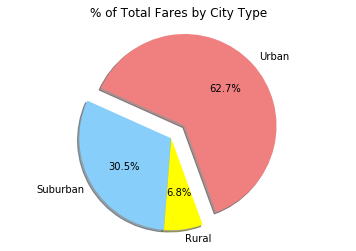

In [55]:
# Calculate Type Percents
#get each type's total fares
total_urban_fares = urban_df['fare'].sum()
total_suburban_fares = suburban_df['fare'].sum()
total_rural_fares = rural_df['fare'].sum()
total_fares = total_urban_fares + total_suburban_fares + total_rural_fares
percent_urban = (total_urban_fares/total_fares)*100
percent_suburban = (total_suburban_fares/total_fares)*100
percent_rural = (total_rural_fares/total_fares)*100

# Build Pie Chart

city_types = ["Urban","Suburban","Rural"]
percentages = [percent_urban, percent_suburban, percent_rural]
colors = ["lightcoral","lightskyblue","yellow"]
explode = (0.2,0,0)

plt.pie(percentages, explode=explode,labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=290)
plt.axis("Equal")
plt.tight_layout
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("PyberCityTypeFarePercentage")

## Total Rides by City Type

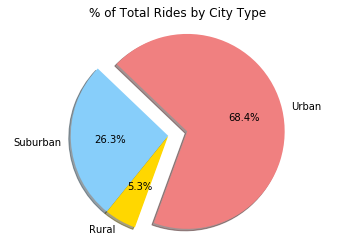

In [219]:
# Calculate Ride Percents
total_urban_rides = len(urban_df)
total_suburban_rides = len(suburban_df)
total_rural_rides = len(rural_df)
total_rides = total_urban_rides+total_suburban_rides+total_rural_rides
percent_urban_rides=(total_urban_rides/total_rides)*100
percent_suburban_rides = (total_suburban_rides/total_rides)*100
percent_rural_rides=(total_rural_rides/total_rides)*100

# Build Pie Chart

percentages = [total_urban_rides,total_suburban_rides,total_rural_rides]

names = ["Urban","Suburban","Rural"]

colors = ["lightcoral","lightskyblue","gold"]

explode=(0.2,0,0)

plt.pie(percentages, explode=explode, labels = names, colors=colors, autopct="%1.1f%%",shadow=True,startangle=250)
plt.tight_layout
plt.axis("Equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("PyberCityTypeRidePercentage")

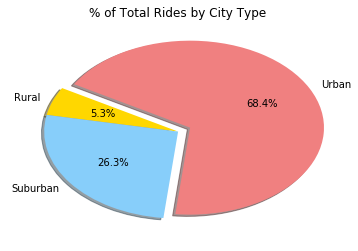

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

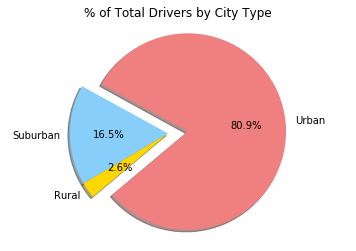

In [220]:
# Calculate Driver Percents

# urban_df_drivers = ride_df.loc[(ride_df['type'] == "Urban"),:]
# suburban_df_drivers = ride_df.loc[(ride_df['type'] == "Suburban"),:]
# rural_df_drivers = ride_df.loc[(ride_df['type'] == "Rural"),:]

driver_count_urban = grouped_urban_df['driver_count'].unique()
driver_count_urban_df = pd.DataFrame({"Driver Count":driver_count_urban})
driver_count_urban_df['Driver Count'] = driver_count_urban_df['Driver Count'].astype(float) 
urban_driver_count_variable = driver_count_urban_df['Driver Count'].sum()

driver_count_suburban = grouped_suburban_df['driver_count'].unique()
driver_count_suburban_df = pd.DataFrame({"Driver Count":driver_count_suburban})
driver_count_suburban_df['Driver Count'] = driver_count_suburban_df['Driver Count'].astype(float)
suburban_driver_count_variable = driver_count_suburban_df['Driver Count'].sum()

driver_count_rural = grouped_rural_df['driver_count'].unique()
driver_count_rural_df = pd.DataFrame({"Driver Count":driver_count_rural})
driver_count_rural_df['Driver Count'] = driver_count_rural_df['Driver Count'].astype(float)
rural_driver_count_variable = driver_count_rural_df['Driver Count'].sum()

total_drivers = urban_driver_count_variable+suburban_driver_count_variable+rural_driver_count_variable
percent_urban_drivers = ((urban_driver_count_variable/total_drivers)*100).astype(float)
percent_suburban_drivers = ((suburban_driver_count_variable/total_drivers)*100).astype(float)
percent_rural_drivers = ((rural_driver_count_variable/total_drivers)*100).astype(float)
percent_urban_drivers_one = float(percent_urban_drivers)
percent_suburban_drivers_one = float(percent_suburban_drivers)
percent_rural_drivers_one = float(percent_rural_drivers)
# Build Pie Charts

city_types = ["Urban","Suburban","Rural"]
percentages = [percent_urban_drivers_one,percent_suburban_drivers_one,percent_rural_drivers_one]
colors = ["lightcoral","lightskyblue","gold"]
explode=(0.2,0,0)

plt.pie(percentages, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%",shadow=True, startangle=220)
plt.axis("Equal")
plt.tight_layout
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("PyberPercentageofDriversperCityType")

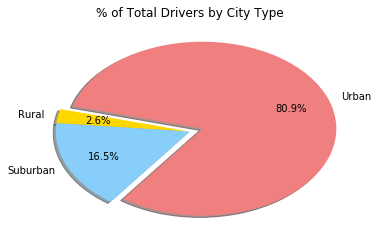

In [6]:
# Show Figure
plt.show()

In [ ]:
#3 Trends of this data

#1. Urban cities have the more drivers per city compared to suburban and rural areas with a lower average fare on average compared to suburban and rural cities.
#2. Urban cities account for the majority of drivers, rides and fares but suburban cities have more share of the total fares relative to their driver and ride count than urban cities.
#3. Rural cities account for the least amount of fares, rides and drivers and does not indicate a good market to pursue revenue from.